# Training and comparison

Objective: Trainining of multiple models using the data and comparison of the results

In [1]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
sns.set_palette('viridis')
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

Loading the datasets

In [2]:
#Loading the datasets
test_sets = ['numeric','categoricals_binned','one_hot_encoded','outliers_removed',
             'one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']
datasets = {}
for key in test_sets:
    datasets[key] = pd.read_csv(f'datasets/{key}.csv')

In [3]:
#Defining the X,y spliter for ease of use
def df_splitter(dataset, target = 'Response'):
    X = dataset.drop(columns=[target])
    y = dataset[target].values
    return X, y

In [4]:
# Defining the printing function
def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("Standard deviation:", scores.std())

## Models

## Dataset tests
Since we have some datasets options, we will try a first run of t

In [5]:
first_results = []

#### K-Neighbors Classifier

In [6]:
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    knn_test = cross_val_score(knn_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'KNN', 'dataset':key, 'score':knn_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(knn_test)


-----
Dataset: numeric
Scores: [0.71228536 0.71211675 0.71491745]

Mean: 0.7131065181467098
Standard deviation: 0.0012823729935557734

-----
Dataset: categoricals_binned
Scores: [0.71059032 0.70769458 0.71005307]

Mean: 0.7094459858904245
Standard deviation: 0.0012577064482832434

-----
Dataset: one_hot_encoded
Scores: [0.71022183 0.70850531 0.70953715]

Mean: 0.7094214273332063
Standard deviation: 0.0007055284432189075

-----
Dataset: outliers_removed
Scores: [0.71475655 0.70724399 0.71301221]

Mean: 0.711670917757777
Standard deviation: 0.00321029198290776

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71464367 0.71395932 0.71587559]

Mean: 0.7148261929129059
Standard deviation: 0.0007928897487709854

-----
Dataset: oversampled+
Scores: [0.62038204 0.6198303  0.6208    ]

Mean: 0.620337448371037
Standard deviation: 0.0003971309629555497

-----
Dataset: oversampled-
Scores: [0.61266322 0.611905   0.6137282 ]

Mean: 0.6127654698725807
Standard deviation: 0.0007478214047553315

--

#### Naive Bayes (Gaussian)

In [7]:
nbg_clf = GaussianNB()
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    nbg_test = cross_val_score(nbg_clf,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
    first_results.append({'model':'Naive Bayes', 'dataset':key, 'score':nbg_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(nbg_test)


-----
Dataset: numeric
Scores: [0.75592679 0.74695983 0.74462597 0.75113622 0.74695983]

Mean: 0.7491217295172583
Standard deviation: 0.003998162378626328

-----
Dataset: categoricals_binned
Scores: [0.75690947 0.74953937 0.74376612 0.75224174 0.746837  ]

Mean: 0.749858739712566
Standard deviation: 0.004510973372125921

-----
Dataset: one_hot_encoded
Scores: [0.75506695 0.74941653 0.7443803  0.7492937  0.74867952]

Mean: 0.7493673995823609
Standard deviation: 0.003401088891060924

-----
Dataset: outliers_removed
Scores: [0.75418227 0.75156055 0.74956305 0.75402672 0.7445374 ]

Mean: 0.7507739966071254
Standard deviation: 0.003554625483263591

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.72583221 0.72976293 0.72816607 0.71919912 0.72288417]

Mean: 0.725168898169758
Standard deviation: 0.003778530191324014

-----
Dataset: oversampled+
Scores: [0.52828054 0.53139394 0.53373737 0.52711111 0.52864646]

Mean: 0.5298338863750629
Standard deviation: 0.0024044679324950508

-----
Dataset

#### Support Vector Machine

In [9]:
svm = SVC(random_state = 1216, C = 1.0, cache_size = 4096)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    svc_test = cross_val_score(svm,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Support Vector Machine', 'dataset':key, 'score':svc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(svc_test)


-----
Dataset: numeric
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: categoricals_binned
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: one_hot_encoded
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: outliers_removed
Scores: [0.76038753 0.76038753]

Mean: 0.7603875349580503
Standard deviation: 0.0

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: oversampled+
Scores: [0.5166462  0.53096516]

Mean: 0.5238056758678648
Standard deviation: 0.007159480250824246

-----
Dataset: oversampled-
Scores: [0.50775245 0.50517394]

Mean: 0.5064631951570698
Standard deviation: 0.0012892521197188644

-----
Dataset: smoted+
Scores: [0.67318508 0.66920939]

Mean: 0.6711972331760294
Standard deviatio

#### Decision Trees

In [12]:
dtc = DecisionTreeClassifier(random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    dtc_test = cross_val_score(dtc,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Default cv value = 5
    first_results.append({'model':'Decision Tree', 'dataset':key, 'score':dtc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(dtc_test)


-----
Dataset: numeric
Scores: [0.66195003 0.66384139 0.66376769]

Mean: 0.6631863711175029
Standard deviation: 0.0008747406010030579

-----
Dataset: categoricals_binned
Scores: [0.63026015 0.63509729 0.63760318]

Mean: 0.6343202078382513
Standard deviation: 0.003047722663274115

-----
Dataset: one_hot_encoded
Scores: [0.64713686 0.64725825 0.64954304]

Mean: 0.6479793844129307
Standard deviation: 0.0011067834046584052

-----
Dataset: outliers_removed
Scores: [0.64539326 0.64281969 0.6404225 ]

Mean: 0.6428784829510718
Standard deviation: 0.002029728015538005

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.64706316 0.64718455 0.64946934]

Mean: 0.647905683393311
Standard deviation: 0.0011067820263821067

-----
Dataset: oversampled+
Scores: [0.77557452 0.77260606 0.7785697 ]

Mean: 0.7755834250583015
Standard deviation: 0.0024346524976599873

-----
Dataset: oversampled-
Scores: [0.7694506  0.77303637 0.77313492]

Mean: 0.7718739619164352
Standard deviation: 0.00171404536073089

---

#### Extra Trees

In [15]:
extrees = ExtraTreesClassifier(n_jobs=-1, random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Default cv value = 5
    first_results.append({'model':'Extra Trees', 'dataset':key, 'score':extrees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(extrees_test)


-----
Dataset: numeric
Scores: [0.74839708 0.74985259 0.75081073]

Mean: 0.7496868023515727
Standard deviation: 0.0009923175815198183

-----
Dataset: categoricals_binned
Scores: [0.73793205 0.73776533 0.73540684]

Mean: 0.7370347402699734
Standard deviation: 0.0011531100974619445

-----
Dataset: one_hot_encoded
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: outliers_removed
Scores: [0.71857678 0.72222638 0.71848079]

Mean: 0.7197613160341841
Standard deviation: 0.0017435067655318006

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: oversampled+
Scores: [0.83142636 0.83515152 0.83369697]

Mean: 0.8334249466447662
Standard deviation: 0.0015329061255170064

-----
Dataset: oversampled-
Scores: [0.83439271 0.82925988 0.83753819]

Mean: 0.8337302586526795
Standard deviation: 0.003411913276928968


#### Random Forest

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=70,
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,n_jobs = -1,
                                 random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    rnd_clf_test = cross_val_score(rnd_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Random Forest', 'dataset':key, 'score':rnd_clf_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(rnd_clf_test)


-----
Dataset: numeric
Scores: [0.75488245 0.75670696 0.7550855 ]

Mean: 0.7555583018265367
Standard deviation: 0.0008164410781646076

-----
Dataset: categoricals_binned
Scores: [0.7478812  0.7499263  0.74985259]

Mean: 0.7492200304343605
Standard deviation: 0.0009471742677313469

-----
Dataset: one_hot_encoded
Scores: [0.74471221 0.75051592 0.75014741]

Mean: 0.7484585123768754
Standard deviation: 0.002653303283560516

-----
Dataset: outliers_removed
Scores: [0.74883895 0.75016855 0.75031838]

Mean: 0.7497752930568754
Standard deviation: 0.0006649128782569847

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.74478591 0.75051592 0.7500737 ]

Mean: 0.7484585105663065
Standard deviation: 0.002603189114267456

-----
Dataset: oversampled+
Scores: [0.82846892 0.83612121 0.8326303 ]

Mean: 0.8324068126234713
Standard deviation: 0.003128028585296697

-----
Dataset: oversampled-
Scores: [0.83178123 0.82743668 0.82970336]

Mean: 0.8296404227649076
Standard deviation: 0.0017742117696808272

-

#### AdaBoost

In [22]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.8, random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    ada_boost_test = cross_val_score(ada_boost,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'AdaBoost', 'dataset':key, 'score':ada_boost_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(ada_boost_test)


-----
Dataset: numeric
Scores: [0.75945169 0.75980248 0.75906545]

Mean: 0.7594398719611991
Standard deviation: 0.0003010065924008337

-----
Dataset: categoricals_binned
Scores: [0.75996757 0.75980248 0.75994988]

Mean: 0.7599066438784113
Standard deviation: 7.401075954548328e-05

-----
Dataset: one_hot_encoded
Scores: [0.75989388 0.75980248 0.75987618]

Mean: 0.7598575104688545
Standard deviation: 3.957989254669246e-05

-----
Dataset: outliers_removed
Scores: [0.76022472 0.76028167 0.76020676]

Mean: 0.760237715066819
Standard deviation: 3.193349830681007e-05

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.75989388 0.75980248 0.75994988]

Mean: 0.7598820780789174
Standard deviation: 6.0753578180248605e-05

-----
Dataset: oversampled+
Scores: [0.56530592 0.56213333 0.55873939]

Mean: 0.5620595506113203
Standard deviation: 0.0026812825313568974

-----
Dataset: oversampled-
Scores: [0.56132052 0.55627279 0.55533655]

Mean: 0.5576432883196627
Standard deviation: 0.0026281390582369975

#### Visualizing the results

In [103]:
results = first_results
results = pd.DataFrame(results)
results = results.pivot(index='model', columns = 'dataset', values = 'score')
results = results.reindex(columns= [ 'numeric','categoricals_binned','one_hot_encoded','one_hot_encoded_rescaled','outliers_removed','oversampled+','oversampled-','smoted+','smoted-'])
results = results.reindex(['KNN', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Extra Trees', 'Random Forest', 'AdaBoost'])
results.style.background_gradient(cmap='bwr_r', low=0.7, high=0.8, axis=0)

dataset,numeric,categoricals_binned,one_hot_encoded,one_hot_encoded_rescaled,outliers_removed,oversampled+,oversampled-,smoted+,smoted-
model,,,,,,,,,
KNN,0.713107,0.709446,0.709421,0.714826,0.711671,0.620337,0.612765,0.616281,0.651036
Naive Bayes,0.749122,0.749859,0.749367,0.725169,0.750774,0.529834,0.534287,0.735228,0.634644
Support Vector Machine,0.760373,0.760373,0.760373,0.760373,0.760388,0.523806,0.506463,0.671197,0.505067
Decision Tree,0.663186,0.634320,0.647979,0.647906,0.642878,0.775583,0.771874,0.691771,0.738548
Extra Trees,0.749687,0.737035,0.720943,0.720943,0.719761,0.833425,0.833730,0.758517,0.786722
Random Forest,0.755558,0.749220,0.748459,0.748459,0.749775,0.832407,0.829640,0.770735,0.805545
AdaBoost,0.759440,0.759907,0.759858,0.759882,0.760238,0.562060,0.557643,0.755899,0.817929


### Improving the models

Reanalizing the best models

#### Extra Trees
'oversampled-' dataset

In [5]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(n_estimators=1000, random_state=1216, n_jobs = -1)
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [6]:
#Setting the parameters for the grid search
min_samples_split = np.array([2,10,40])
max_depth = np.array([10,50,100,None])
max_leaf_nodes = np.array([5,20,None])
values_grid = {'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'max_leaf_nodes':max_leaf_nodes}

In [7]:
#Using grid search to find the best values
gridExtraTrees = GridSearchCV(estimator = extra_tree,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridExtraTrees.fit(X_train, y_train);

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.568 total time=   4.5s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=2;, score=0.559 total time=   3.6s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.568 total time=   3.3s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=10;, score=0.559 total time=   3.0s
[CV 1/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.568 total time=   3.4s
[CV 2/2] END max_depth=10, max_leaf_nodes=5, min_samples_split=40;, score=0.559 total time=   2.9s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.579 total time=   4.0s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=2;, score=0.573 total time=   3.7s
[CV 1/2] END max_depth=10, max_leaf_nodes=20, min_samples_split=10;, score=0.579 total time=   4.0s
[CV 2/2] END max_depth=10, max_leaf_nodes=20, min

In [8]:
extra_trees_results = pd.DataFrame(gridExtraTrees.cv_results_)
extra_trees_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,21.261000,0.611980,2.901989,0.047012,50,None,2,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.778990,0.777570,0.778280,0.000710,1
24,21.153958,0.468042,2.908001,0.050001,100,None,2,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.778563,0.777898,0.778230,0.000332,2
33,20.466670,0.584650,3.444990,0.619011,None,None,2,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.778563,0.777898,0.778230,0.000332,2
16,14.966989,0.052010,2.475501,0.057500,50,None,10,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.734380,0.739003,0.736692,0.002312,4
34,14.525990,0.772012,2.592503,0.109498,None,None,10,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.734183,0.739003,0.736593,0.002410,5
25,14.335109,0.219109,2.434500,0.032501,100,None,10,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.734183,0.739003,0.736593,0.002410,5
26,10.837001,0.147001,2.001499,0.050500,100,None,40,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.671934,0.674978,0.673456,0.001522,7
17,11.005521,0.062502,2.078479,0.011498,50,None,40,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.671934,0.674978,0.673456,0.001522,7
35,10.879758,0.112759,2.002000,0.079001,None,None,40,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.671934,0.674978,0.673456,0.001522,7
6,6.085502,0.298501,1.311499,0.128500,10,None,2,"{'max_depth': 10, 'max_leaf_nodes': None, 'min...",0.618586,0.609178,0.613882,0.004704,10


In [ ]:
best_extra_trees = gridExtraTrees.best_estimator_
best_extra_trees.fit(X_train, y_train);

In [ ]:
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

In [334]:
gridDecisionTree.fit(X_train, y_train);

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [ ]:
extra_trees_results = pd.DataFrame(gridDecisionTree.cv_results_)

In [299]:
best_extra_trees = gridDecisionTree.best_estimator_

In [300]:
best_extra_tres.fit(X_train, y_train);

In [ ]:
teste_xtr = best.predict(X_test)

In [302]:
print(classification_report(y_test, teste))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



#### Random Forest

In [352]:
#Setting the Classifier
rand_forest = RandomForestClassifier(criterion='gini',
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,
                                 n_jobs = -1)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [353]:
# Grid search parameters
n_estimators = np.array([1000,2000])
max_depth = np.array([50,None])
values_grid_forest = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [354]:
gridForest = GridSearchCV(estimator = rand_forest,
                                param_grid = values_grid_forest,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridForest.fit(X_train, y_train);

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...max_depth=50, n_estimators=1000;, score=0.778 total time=  25.7s
[CV 2/2] END ...max_depth=50, n_estimators=1000;, score=0.781 total time=  27.7s


KeyboardInterrupt: 

In [306]:
grid_rforest.fit(X_train, y_train);

Fitting 2 folds for each of 588 candidates, totalling 1176 fits
[CV 1/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=70;, score=(train=0.537, test=0.529) total time=   0.7s
[CV 2/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=70;, score=(train=0.552, test=0.549) total time=   0.6s
[CV 1/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=100;, score=(train=0.551, test=0.551) total time=   0.9s
[CV 2/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=100;, score=(train=0.552, test=0.551) total time=   0.9s
[CV 1/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=200;, score=(train=0.541, test=0.534) total time=   1.7s
[CV 2/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=200;, score=(train=0.551, test=0.548) total time=   1.6s
[CV 1/2] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=500;, score=(train=0.548, test=0.542) total time=   4.0s
[CV 2/2

In [307]:
pd.DataFrame(gridDecisionTree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.692484,0.017465,0.095787,0.023797,entropy,3,2,70,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.528670,0.549098,0.538884,0.010214,579,0.536945,0.551587,0.544266,0.007321
1,0.876325,0.015506,0.098976,0.003998,entropy,3,2,100,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.550520,0.550585,0.550553,0.000032,508,0.550714,0.551619,0.551167,0.000453
2,1.576537,0.015613,0.165728,0.000269,entropy,3,2,200,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.534424,0.547611,0.541018,0.006594,567,0.540597,0.550844,0.545720,0.005123
3,3.660506,0.057267,0.349392,0.010410,entropy,3,2,500,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.542246,0.549421,0.545834,0.003588,536,0.547708,0.551749,0.549728,0.002020
4,0.870473,0.001480,0.101487,0.004493,entropy,3,2,100,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.548807,0.550391,0.549599,0.000792,512,0.549971,0.551296,0.550634,0.000663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2.421008,0.049993,0.262492,0.000509,gini,None,None,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.776909,0.773579,0.775244,0.001665,20,1.000000,1.000000,1.000000,0.000000
584,4.876010,0.206990,0.574489,0.017488,gini,None,None,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.779850,0.777652,0.778751,0.001099,2,1.000000,1.000000,1.000000,0.000000
585,12.264705,0.522295,1.533107,0.184894,gini,None,None,500,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.778945,0.775680,0.777313,0.001632,5,1.000000,1.000000,1.000000,0.000000
586,2.607009,0.026009,0.305094,0.022909,gini,None,None,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.778396,0.776004,0.777200,0.001196,6,1.000000,1.000000,1.000000,0.000000


In [308]:
best = gridDecisionTree.best_estimator_

In [309]:
best.fit(X_train, y_train);

In [311]:
teste = best.predict(X_test)
print(classification_report(y_test, teste))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7750
           1       0.88      0.94      0.91      7720

    accuracy                           0.91     15470
   macro avg       0.91      0.91      0.91     15470
weighted avg       0.91      0.91      0.91     15470



#### Adaboost

adaboost - smote-



In [312]:
ada_boost = AdaBoostClassifier(random_state = 1216)
X, y = df_splitter(datasets['smoted-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
# Grid search parameters
n_estimators = np.array([70,100,150,200,300,500,600])
learning_rate = np.array([0.5,1,1.5,2,3,5,10])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [314]:
gridDecisionTree = GridSearchCV(estimator = ada_boost,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1,
                                return_train_score= True)

In [317]:
gridDecisionTree.fit(X_train, y_train);

Fitting 2 folds for each of 49 candidates, totalling 98 fits
[CV 1/2] END learning_rate=0.5, n_estimators=70;, score=(train=0.785, test=0.788) total time=   2.6s
[CV 2/2] END learning_rate=0.5, n_estimators=70;, score=(train=0.788, test=0.785) total time=   2.6s
[CV 1/2] END learning_rate=0.5, n_estimators=100;, score=(train=0.793, test=0.796) total time=   3.8s
[CV 2/2] END learning_rate=0.5, n_estimators=100;, score=(train=0.797, test=0.793) total time=   4.0s
[CV 1/2] END learning_rate=0.5, n_estimators=150;, score=(train=0.802, test=0.805) total time=   5.5s
[CV 2/2] END learning_rate=0.5, n_estimators=150;, score=(train=0.806, test=0.804) total time=   5.5s
[CV 1/2] END learning_rate=0.5, n_estimators=200;, score=(train=0.809, test=0.810) total time=   7.6s
[CV 2/2] END learning_rate=0.5, n_estimators=200;, score=(train=0.810, test=0.807) total time=   6.9s
[CV 1/2] END learning_rate=0.5, n_estimators=300;, score=(train=0.811, test=0.813) total time=  10.8s
[CV 2/2] END learning_r

In [318]:
ada3 = pd.DataFrame(gridDecisionTree.cv_results_)

In [339]:
ada3.sort_values(by=['rank_test_score'], ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
17,5.521178,1.588398e-01,1.555501,0.052497,1.5,200,"{'learning_rate': 1.5, 'n_estimators': 200}",0.819066,0.816563,0.817814,0.001251,1,0.817220,0.819099,0.818159,0.000939
18,8.054733,1.282513e-01,2.292000,0.009001,1.5,300,"{'learning_rate': 1.5, 'n_estimators': 300}",0.818770,0.816662,0.817716,0.001054,2,0.817614,0.819296,0.818455,0.000841
13,16.096500,3.765002e-01,4.601483,0.114499,1.0,600,"{'learning_rate': 1.0, 'n_estimators': 600}",0.818573,0.816662,0.817617,0.000956,3,0.817713,0.819986,0.818849,0.001136
12,14.478000,2.290028e-01,4.492502,0.145502,1.0,500,"{'learning_rate': 1.0, 'n_estimators': 500}",0.818474,0.816629,0.817552,0.000923,4,0.817647,0.819427,0.818537,0.000890
16,3.951005,6.437302e-06,1.111511,0.002489,1.5,150,"{'learning_rate': 1.5, 'n_estimators': 150}",0.818836,0.815840,0.817338,0.001498,5,0.816662,0.819263,0.817962,0.001301
19,13.603209,3.968124e-01,3.716492,0.015492,1.5,500,"{'learning_rate': 1.5, 'n_estimators': 500}",0.818442,0.816136,0.817289,0.001153,6,0.817943,0.819131,0.818537,0.000594
20,15.790011,6.699562e-02,4.536492,0.016492,1.5,600,"{'learning_rate': 1.5, 'n_estimators': 600}",0.818376,0.815972,0.817174,0.001202,7,0.817812,0.819131,0.818471,0.000660
11,8.399500,6.149924e-02,2.450999,0.040986,1.0,300,"{'learning_rate': 1.0, 'n_estimators': 300}",0.817686,0.815479,0.816583,0.001103,8,0.816925,0.817916,0.817420,0.000496
6,16.664007,1.899254e-02,4.747497,0.100513,0.5,600,"{'learning_rate': 0.5, 'n_estimators': 600}",0.817029,0.815611,0.816320,0.000709,9,0.815808,0.818047,0.816928,0.001120
15,2.664502,3.550267e-02,0.772999,0.017004,1.5,100,"{'learning_rate': 1.5, 'n_estimators': 100}",0.816504,0.815840,0.816172,0.000332,10,0.813968,0.818737,0.816353,0.002385


best = gridDecisionTree.best_estimator_

best.fit(X_train, y_train);

teste = best.predict(X_test)

print(classification_report(y_test, teste))

-----

In [340]:
rand_forest = RandomForestClassifier(criterion='gini',
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,
                                 n_jobs = -1)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [341]:
# Grid search parameters
n_estimators = np.array([1000,2000])
max_depth = np.array([15,50,None])
values_grid_forest = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [342]:
#Using grid search to find the best values
gridForest = GridSearchCV(estimator = rand_forest,
                                param_grid = values_grid_forest,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridForest.fit(X_train, y_train);

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ...max_depth=15, n_estimators=1000;, score=0.698 total time=  17.7s
[CV 2/2] END ...max_depth=15, n_estimators=1000;, score=0.704 total time=  16.3s
[CV 1/2] END ...max_depth=15, n_estimators=2000;, score=0.698 total time=  35.8s
[CV 2/2] END ...max_depth=15, n_estimators=2000;, score=0.704 total time=  34.5s
[CV 1/2] END ...max_depth=50, n_estimators=1000;, score=0.780 total time=  28.3s
[CV 2/2] END ...max_depth=50, n_estimators=1000;, score=0.782 total time=  30.2s
[CV 1/2] END ...max_depth=50, n_estimators=2000;, score=0.778 total time= 1.0min
[CV 2/2] END ...max_depth=50, n_estimators=2000;, score=0.781 total time= 1.1min
[CV 1/2] END .max_depth=None, n_estimators=1000;, score=0.780 total time=  31.5s
[CV 2/2] END .max_depth=None, n_estimators=1000;, score=0.779 total time=  30.0s
[CV 1/2] END .max_depth=None, n_estimators=2000;, score=0.779 total time=  56.5s
[CV 2/2] END .max_depth=None, n_estimators=2000;,

# SAGEMAKER TIMEOUT

In [37]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(n_estimators=1000, random_state=1216, n_jobs = -1)
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [114]:
#Setting the parameters for the grid search
min_samples_split = np.array([2,10,40])
max_depth = np.array([50])
max_leaf_nodes = np.array([5,20,None])
values_grid = {'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'max_leaf_nodes':max_leaf_nodes}

In [115]:
#Using grid search to find the best values
gridExtraTrees = GridSearchCV(estimator = extra_tree,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridExtraTrees.fit(X_train, y_train);

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=2;, score=0.560 total time=   4.6s
[CV 2/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=2;, score=0.565 total time=   3.2s
[CV 1/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=10;, score=0.560 total time=   3.7s
[CV 2/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=10;, score=0.565 total time=   3.2s
[CV 1/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=40;, score=0.559 total time=   3.1s
[CV 2/2] END max_depth=50, max_leaf_nodes=5, min_samples_split=40;, score=0.565 total time=   3.2s
[CV 1/2] END max_depth=50, max_leaf_nodes=20, min_samples_split=2;, score=0.573 total time=   4.5s
[CV 2/2] END max_depth=50, max_leaf_nodes=20, min_samples_split=2;, score=0.577 total time=   4.2s
[CV 1/2] END max_depth=50, max_leaf_nodes=20, min_samples_split=10;, score=0.572 total time=   4.5s
[CV 2/2] END max_depth=50, max_leaf_nodes=20, min_

In [40]:
extra_trees_results = pd.DataFrame(gridExtraTrees.cv_results_)
extra_trees_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
15,22.116010,0.803992,3.258242,0.350760,50,None,2,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.778990,0.777570,0.778280,0.000710,1
24,27.047147,2.132966,3.683592,0.223590,100,None,2,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.778563,0.777898,0.778230,0.000332,2
33,21.062875,0.510874,3.192063,0.123935,None,None,2,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.778563,0.777898,0.778230,0.000332,2
16,13.963256,0.129254,2.354501,0.026500,50,None,10,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.734380,0.739003,0.736692,0.002312,4
34,15.457785,0.242784,2.746001,0.108001,None,None,10,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.734183,0.739003,0.736593,0.002410,5
25,16.766568,1.280484,2.620498,0.131499,100,None,10,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.734183,0.739003,0.736593,0.002410,5
26,10.242273,0.178831,1.978014,0.090016,100,None,40,"{'max_depth': 100, 'max_leaf_nodes': None, 'mi...",0.671934,0.674978,0.673456,0.001522,7
17,12.022001,0.039999,2.425501,0.307500,50,None,40,"{'max_depth': 50, 'max_leaf_nodes': None, 'min...",0.671934,0.674978,0.673456,0.001522,7
35,11.120499,0.167501,2.210259,0.207256,None,None,40,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.671934,0.674978,0.673456,0.001522,7
6,6.031060,0.118056,1.182779,0.000781,10,None,2,"{'max_depth': 10, 'max_leaf_nodes': None, 'min...",0.618586,0.609178,0.613882,0.004704,10


In [116]:
print(gridExtraTrees.best_estimator_)

ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                     random_state=1216)


In [117]:
best_extra_trees = gridExtraTrees.best_estimator_
best_extra_trees.fit(X_train, y_train);

In [43]:
teste_xtr = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste_xtr))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7581
           1       0.88      0.93      0.91      7640

    accuracy                           0.90     15221
   macro avg       0.91      0.90      0.90     15221
weighted avg       0.91      0.90      0.90     15221



## RANDOM FOREST

In [29]:
#Setting the Classifier
rand_forest = RandomForestClassifier(criterion='gini',
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,
                                 n_jobs = -1)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [30]:
# Grid search parameters
n_estimators = np.array([1000,2000])
max_depth = np.array([50,None])
values_grid_forest = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [31]:
#Using grid search to find the best values
gridForest = GridSearchCV(estimator = rand_forest,
                                param_grid = values_grid_forest,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridForest.fit(X_train, y_train);

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...max_depth=50, n_estimators=1000;, score=0.778 total time=  29.1s
[CV 2/2] END ...max_depth=50, n_estimators=1000;, score=0.782 total time=  27.0s
[CV 1/2] END ...max_depth=50, n_estimators=2000;, score=0.778 total time=  51.7s
[CV 2/2] END ...max_depth=50, n_estimators=2000;, score=0.781 total time=  50.3s
[CV 1/2] END .max_depth=None, n_estimators=1000;, score=0.780 total time=  24.7s
[CV 2/2] END .max_depth=None, n_estimators=1000;, score=0.781 total time=  25.1s
[CV 1/2] END .max_depth=None, n_estimators=2000;, score=0.779 total time=  49.8s
[CV 2/2] END .max_depth=None, n_estimators=2000;, score=0.780 total time=  52.9s


In [32]:
forest_results = pd.DataFrame(gridForest.cv_results_)
forest_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
2,22.539212,0.205972,2.415994,0.009011,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.779785,0.781208,0.780496,0.000711,1
3,45.888707,0.965653,5.553616,0.619371,None,2000,"{'max_depth': None, 'n_estimators': 2000}",0.779494,0.780432,0.779963,0.000469,2
0,25.602889,1.002855,2.541676,0.011871,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.777781,0.781854,0.779818,0.002036,3
1,46.237143,0.739148,4.889072,0.031913,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.778428,0.780981,0.779705,0.001277,4


In [33]:
gridForest.best_estimator_

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)

In [34]:
best_forest = gridForest.best_estimator_
best_forest.fit(X_train, y_train);

In [36]:
teste_rnd = best_forest.predict(X_test)
print(classification_report(y_test, teste_rnd))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7680
           1       0.89      0.93      0.91      7790

    accuracy                           0.91     15470
   macro avg       0.91      0.91      0.91     15470
weighted avg       0.91      0.91      0.91     15470



#### ADABOOST

In [9]:
#Setting the classifier
ada_boost = AdaBoostClassifier(random_state = 1216)
X, y = df_splitter(datasets['smoted-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [10]:
n_estimators = np.array([200,300,600])
learning_rate = np.array([1.0,1.5])
values_grid_ada = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [11]:
#Using grid search to find the best values
gridAda = GridSearchCV(estimator = ada_boost,
                                param_grid = values_grid_ada,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)
gridAda.fit(X_train, y_train);

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END learning_rate=1.0, n_estimators=200;, score=0.814 total time=   6.9s
[CV 2/2] END learning_rate=1.0, n_estimators=200;, score=0.815 total time=   7.0s
[CV 1/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  10.4s
[CV 2/2] END learning_rate=1.0, n_estimators=300;, score=0.817 total time=  10.4s
[CV 1/2] END learning_rate=1.0, n_estimators=600;, score=0.817 total time=  20.7s
[CV 2/2] END learning_rate=1.0, n_estimators=600;, score=0.818 total time=  20.3s
[CV 1/2] END learning_rate=1.5, n_estimators=200;, score=0.817 total time=   6.6s
[CV 2/2] END learning_rate=1.5, n_estimators=200;, score=0.818 total time=   6.5s
[CV 1/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=  10.3s
[CV 2/2] END learning_rate=1.5, n_estimators=300;, score=0.817 total time=   9.8s
[CV 1/2] END learning_rate=1.5, n_estimators=600;, score=0.817 total time=  19.3s
[CV 2/2] END learning_rate=1.5, n_esti

In [13]:
ada_results = pd.DataFrame(gridAda.cv_results_)
ada_results.sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
2,16.329516,0.301499,4.286994,0.105011,1.0,600,"{'learning_rate': 1.0, 'n_estimators': 600}",0.817489,0.818041,0.817765,0.000276,1
3,5.216989,0.044990,1.472008,0.012014,1.5,200,"{'learning_rate': 1.5, 'n_estimators': 200}",0.817390,0.817549,0.817470,0.000079,2
1,8.347001,0.014000,2.175508,0.032493,1.0,300,"{'learning_rate': 1.0, 'n_estimators': 300}",0.817259,0.817384,0.817322,0.000063,3
4,7.993500,0.098484,2.161003,0.114998,1.5,300,"{'learning_rate': 1.5, 'n_estimators': 300}",0.817423,0.817089,0.817256,0.000167,4
5,15.428005,0.227010,4.166493,0.011508,1.5,600,"{'learning_rate': 1.5, 'n_estimators': 600}",0.816799,0.817122,0.816960,0.000161,5
0,5.543011,0.100033,1.508509,0.005508,1.0,200,"{'learning_rate': 1.0, 'n_estimators': 200}",0.814335,0.814724,0.814530,0.000194,6


In [16]:
gridAda.best_estimator_

AdaBoostClassifier(n_estimators=600, random_state=1216)

In [18]:
best_ada = gridAda.best_estimator_
best_ada.fit(X_train, y_train);

In [20]:
teste_ada = best_ada.predict(X_test)
print(classification_report(y_test, teste_ada))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      7581
           1       0.93      0.68      0.79      7640

    accuracy                           0.82     15221
   macro avg       0.84      0.82      0.81     15221
weighted avg       0.84      0.82      0.81     15221



### Final processing

Extra tress cross validation

In [44]:
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
extrees = ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1)
extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=10, scoring='accuracy')
display_scores(extrees_test)

Scores: [0.88898013 0.89275743 0.8845459  0.88879763 0.88764783 0.88452694
 0.89273982 0.88764783 0.89388962 0.88206307]

Mean: 0.8883596208366955
Standard deviation: 0.003736017853944822


Random forest Cross validation

In [45]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rand_forest = RandomForestClassifier(criterion='gini',max_leaf_nodes=None,bootstrap=True,oob_score=True,n_estimators=1000,n_jobs = -1)
rand_forest_test = cross_val_score(rand_forest,X_train,y_train, n_jobs=-1, cv=10, scoring='accuracy')
display_scores(rand_forest_test)

Scores: [0.88768584 0.89140271 0.88623142 0.89091791 0.88994829 0.89091791
 0.88766769 0.89348634 0.89073865 0.90415387]

Mean: 0.8913150621614289
Standard deviation: 0.004736992309822998


In [46]:
X, y = df_splitter(datasets['outliers_removed'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
extrees = ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1)
extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
display_scores(extrees_test)

Scores: [0.71710362 0.7113608  0.72172285 0.71756774 0.72056437]

Mean: 0.7176638734607088
Standard deviation: 0.003603886423134835


In [48]:
X, y = df_splitter(datasets['one_hot_encoded_rescaled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rand_forest = RandomForestClassifier(criterion='gini',max_leaf_nodes=None,bootstrap=True,oob_score=True,n_estimators=1000,n_jobs = -1)
rand_forest_test = cross_val_score(rand_forest,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
display_scores(rand_forest_test)

Scores: [0.75408426 0.74867952 0.75052205 0.75039921 0.75125906]

Mean: 0.7509888220120378
Standard deviation: 0.0017636989161820362


In [50]:
X, y = df_splitter(datasets['one_hot_encoded_rescaled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
teste = best_forest.predict(X_test)
print(classification_report(y_test, teste))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7681
           1       0.92      0.96      0.94      2496

    accuracy                           0.97     10177
   macro avg       0.96      0.97      0.96     10177
weighted avg       0.97      0.97      0.97     10177



In [52]:
X, y = df_splitter(datasets['one_hot_encoded_rescaled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
teste = best_extra_trees.predict(X_test)
print(classification_report(y_test, teste))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7679
           1       0.89      0.73      0.80      2498

    accuracy                           0.91     10177
   macro avg       0.90      0.85      0.87     10177
weighted avg       0.91      0.91      0.91     10177



# AGAIN

### 4. Further cross-validation

Further cross validation to verify possible overfitting

In [54]:
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
extrees = ExtraTreesClassifier(max_depth=50, n_estimators=1000, n_jobs=-1)
extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=20, scoring='accuracy')
display_scores(extrees_test)

Scores: [0.90147783 0.90114943 0.8955665  0.90111695 0.89191853 0.90078844
 0.90078844 0.90013141 0.89586071 0.90013141 0.89323259 0.89388962
 0.90243101 0.88863338 0.88567674 0.88764783 0.9021025  0.89520368
 0.8978318  0.89684625]

Mean: 0.8966212517450678
Standard deviation: 0.004989290002455759


In [55]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rand_forest = RandomForestClassifier(criterion='gini',max_leaf_nodes=None,bootstrap=True,oob_score=True,n_estimators=1000,n_jobs = -1)
rand_forest_test = cross_val_score(rand_forest,X_train,y_train, n_jobs=-1, cv=20, scoring='accuracy')
display_scores(rand_forest_test)

Scores: [0.90012928 0.90885585 0.89689722 0.89172592 0.90368455 0.89301875
 0.89301875 0.89625081 0.89948287 0.90917906 0.89625081 0.89431157
 0.89883646 0.89819005 0.89528119 0.89463478 0.88587132 0.89848044
 0.90365341 0.89848044]

Mean: 0.8978116755916721
Standard deviation: 0.005431703718543959


In [104]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
teste_rnd = best_forest.predict(y_test)
print(classification_report(y_test, teste_rnd))

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
final_sets = ['one_hot_encoded','outliers_removed','one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']

In [58]:
def print_scores(scores, dataset):
    print("\nMean score:", scores.mean())
    print("Standard deviation:", scores.std())

In [62]:
for key in final_sets:
    X, y = df_splitter(datasets[key])
    teste_rnd = best_forest.predict(X)
    print(classification_report(y, teste_rnd))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     38673
           1       0.93      0.41      0.57     12209

    accuracy                           0.85     50882
   macro avg       0.89      0.70      0.74     50882
weighted avg       0.86      0.85      0.83     50882

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     38052
           1       0.93      0.40      0.56     12009

    accuracy                           0.85     50061
   macro avg       0.89      0.70      0.74     50061
weighted avg       0.86      0.85      0.83     50061

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     38673
           1       0.93      0.97      0.95     12209

    accuracy                           0.97     50882
   macro avg       0.96      0.97      0.97     50882
weighted avg       0.98      0.97      0.98     50882

              preci

In [63]:
for key in final_sets:
    X, y = df_splitter(datasets[key])
    teste_rnd = best_extra_trees.predict(X)
    print(classification_report(y, teste_rnd))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     38673
           1       0.92      0.96      0.94     12209

    accuracy                           0.97     50882
   macro avg       0.95      0.97      0.96     50882
weighted avg       0.97      0.97      0.97     50882

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     38052
           1       0.92      0.97      0.95     12009

    accuracy                           0.97     50061
   macro avg       0.96      0.97      0.96     50061
weighted avg       0.97      0.97      0.97     50061

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     38673
           1       0.88      0.71      0.78     12209

    accuracy                           0.91     50882
   macro avg       0.89      0.84      0.86     50882
weighted avg       0.90      0.91      0.90     50882

              preci

In [105]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
teste_rnd = best_forest.predict(X_test)
print(classification_report(y_test, teste_rnd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7660
           1       0.98      0.98      0.98      7810

    accuracy                           0.98     15470
   macro avg       0.98      0.98      0.98     15470
weighted avg       0.98      0.98      0.98     15470



In [109]:
from sklearn.metrics import accuracy_score, precision_score, roc_curve, classification_report, confusion_matrix

Text(0, 0.5, 'True Positive rate')

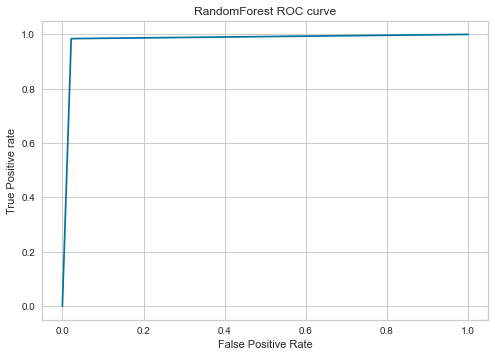

In [110]:
fpr, tpr, thresh = roc_curve(y_test, teste_rnd, pos_label=1)
plt.plot(fpr, tpr,label='Random Forest')
plt.title('RandomForest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9816418875242404

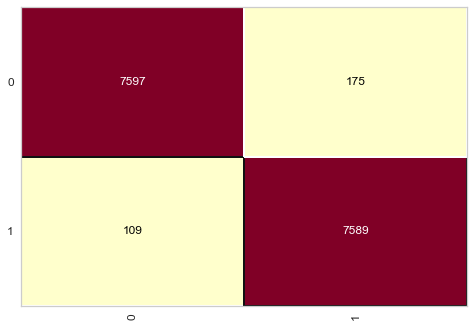

In [64]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cm = ConfusionMatrix(best_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [79]:
datasets['oversampled+'].columns

Index(['Age', 'Age_Gap', 'Has_Own_House', 'Is_Spouse',
       'Reco_Individual_Insurance', 'Reco_Policy_Premium',
       'Holding_Policy_Duration', 'Health_Indicator_2', 'Health_Indicator_3',
       'Health_Indicator_4', 'Health_Indicator_5', 'City_Group_1',
       'City_Group_2', 'City_Group_3', 'City_Group_4', 'Region_Group_1',
       'Region_Group_2', 'Region_Group_3', 'Region_Group_4', 'Region_Group_5',
       'Region_Group_6', 'Region_Group_7', 'Region_Group_8', 'Region_Group_9',
       'Region_Group_10', 'Region_Group_11', 'Region_Group_12',
       'Region_Group_13', 'Region_Group_14', 'Region_Group_15',
       'Region_Group_16', 'Region_Group_17', 'Region_Group_18',
       'Region_Group_19', 'Holding_Policy_Type_1', 'Holding_Policy_Type_2',
       'Holding_Policy_Type_3', 'Holding_Policy_Type_4',
       'Reco_Policy_Groups_1', 'Reco_Policy_Groups_2', 'Reco_Policy_Groups_3',
       'Reco_Policy_Groups_4', 'Response'],
      dtype='object')

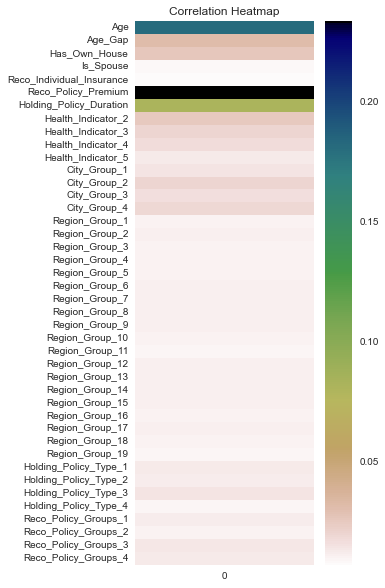

In [93]:
plt.figure(figsize = (4,10))
sns.heatmap(feature_imp, annot=False, cmap='gist_earth_r').set(title='Correlation Heatmap');

In [100]:
global_correlation, global_labels = X.global_phik(interval_cols=X.columns)

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


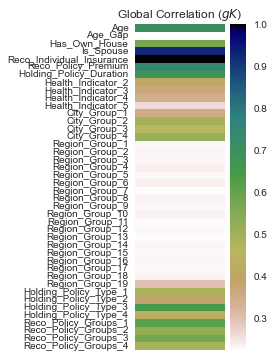

In [101]:

plt.figure(figsize = (2,6))
sns.heatmap(global_correlation, xticklabels=[''], yticklabels=global_labels,cmap='gist_earth_r').set(title=r'Global Correlation ($gK$)');

In [86]:
feature_imp = pd.DataFrame(best_forest.feature_importances_, index = X.columns)

In [87]:
feature_imp

,0
Age,0.180732
Age_Gap,0.031301
Has_Own_House,0.025632
Is_Spouse,0.008090
Reco_Individual_Insurance,0.006745
Reco_Policy_Premium,0.233687
Holding_Policy_Duration,0.081815
Health_Indicator_2,0.025126
Health_Indicator_3,0.019664
Health_Indicator_4,0.016751


In [65]:
import joblib

joblib.dump(best_forest, "my_random_forest.joblib")



['my_random_forest.joblib']

In [ ]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")

In [112]:
dump(best_forest, './preprocessed_pipeline.pkl', compress='zlib')

['./preprocessed_pipeline.pkl']

In [113]:
loaded_preprocessed_pipeline = joblib.load('./preprocessed_pipeline.pkl')

In [72]:


joblib_file = 'best_forest.joblib'

with open(joblib_file, 'wb') as f:
    dump(best_forest, f, compress='zlib')

In [74]:
from joblib import dump, load

In [119]:
loaded_preprocessed_pipeline.predict

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9805429864253393

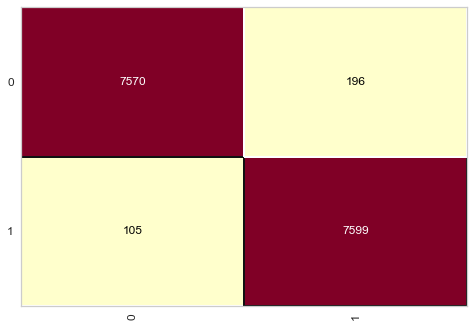

In [122]:
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cm = ConfusionMatrix(loaded_preprocessed_pipeline)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [73]:
# Name of the file

loaded_forest = None

with open(joblib_file, 'wb') as f:
    load(best_forest, f)

TypeError: expected str, bytes or os.PathLike object, not RandomForestClassifier

^^  IF it works above delete below VV